In [315]:

import numpy 
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
%matplotlib inline
pandas.__version__

u'0.18.1'

In [316]:
numpy.random.seed(7)

   International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
0                                                112                             
1                                                118                             
2                                                132                             
3                                                129                             
4                                                121                             


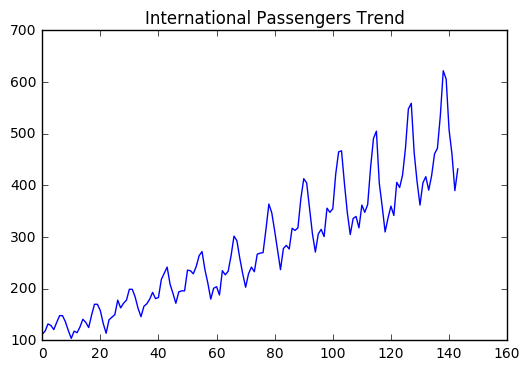

In [317]:
# load the dataset
dataframe = pandas.read_csv('international-airline-passengers.csv', usecols=[1], engine='python', skipfooter=3)
print dataframe.head()
dataset = dataframe.values
dataset = dataset.astype('float32')
plt.plot(dataset)
plt.title("International Passengers Trend")
plt.show()

In [318]:

# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)


# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print"Length of Training data is %d and Test data is %d" %(len(train), len(test))


Length of Training data is 96 and Test data is 48


In [337]:
'''
Create the dataset by making x(t) as X and x(t+1) as Y

'''
def create_dataset(data_set,look_back):
    X=[]
    Y=[]
    for i in range(len(data_set)-look_back-1):
        curr = data_set[i]
        X.append(curr)
        nxt = data_set[i+look_back]
        Y.append(nxt)
    #print numpy.hstack((numpy.asanyarray(X),numpy.asanyarray(Y)))
    return numpy.array(X),numpy.array(Y)
    

In [338]:
tr_X,tr_Y=create_dataset(train,look_back=1)
print len(tr_X)

94


In [339]:
tst_X,tst_Y=create_dataset(test,look_back=1)
print type(tst_X)

<type 'numpy.ndarray'>


In [340]:
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(tr_X, (tr_X.shape[0], 1, tr_X.shape[1]))
testX = numpy.reshape(tst_X, (tst_X.shape[0], 1, tst_X.shape[1]))

In [323]:

# create and fit the LSTM network
look_back=1
model = Sequential()
model.add(LSTM(16, input_dim=look_back))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, tr_Y, nb_epoch=100, batch_size=2, verbose=1)

Epoch 1/100
94/94 [==============================] - 4s - loss: 0.0410     
Epoch 2/100
94/94 [==============================] - 4s - loss: 0.0197     
Epoch 3/100
94/94 [==============================] - 4s - loss: 0.0126     
Epoch 4/100
94/94 [==============================] - 4s - loss: 0.0109     
Epoch 5/100
94/94 [==============================] - 4s - loss: 0.0099     
Epoch 6/100
94/94 [==============================] - 4s - loss: 0.0090     
Epoch 7/100
94/94 [==============================] - 4s - loss: 0.0081     
Epoch 8/100
94/94 [==============================] - 4s - loss: 0.0072     
Epoch 9/100
94/94 [==============================] - 4s - loss: 0.0063     
Epoch 10/100
94/94 [==============================] - 4s - loss: 0.0055     
Epoch 11/100
94/94 [==============================] - 4s - loss: 0.0048     
Epoch 12/100
94/94 [==============================] - 4s - loss: 0.0042     
Epoch 13/100
94/94 [==============================] - 4s - loss: 0.0036     
Epoch 14

In [324]:
#import theano; print(theano.config)

In [325]:
THEANO_FLAGS='floatX=float32,device=gpu0,lib.cnmem=1'

In [341]:

# make predictions
trainScore=0.0
testScore=0.0
trainPredict = model.predict(trainX)

testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
tr_Y = scaler.inverse_transform(tr_Y)
testPredict = scaler.inverse_transform(testPredict)
tst_Y = scaler.inverse_transform(tst_Y)
# calculate root mean squared error
#print len(trainPredict)
#print len(trainY)
#s= numpy.subtract(trainPredict,tr_Y)**2
#print numpy.sum(numpy.sqrt(s))/len(tr_Y)

trainScore = math.sqrt(mean_squared_error(tr_Y, trainPredict))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(tst_Y, testPredict))
print('Test Score: %.2f RMSE' % (testScore))

[[ 121.16712189]
 [ 126.73699188]
 [ 139.79350281]
 [ 136.98902893]
 [ 129.5279541 ]
 [ 142.60137939]
 [ 154.80500793]
 [ 154.80500793]
 [ 143.53808594]
 [ 127.66687775]
 [ 113.76708984]
 [ 126.73699188]
 [ 123.95001221]
 [ 134.18806458]
 [ 148.2268219 ]
 [ 142.60137939]
 [ 133.25521851]
 [ 155.74601746]
 [ 175.56843567]
 [ 175.56843567]
 [ 164.2277832 ]
 [ 140.72909546]
 [ 123.02191925]
 [ 147.28837585]
 [ 151.98388672]
 [ 156.68730164]
 [ 183.14533997]
 [ 168.94903564]
 [ 177.46156311]
 [ 183.14533997]
 [ 203.07778931]
 [ 203.07778931]
 [ 188.83493042]
 [ 168.00431824]
 [ 152.9239502 ]
 [ 171.78462219]
 [ 176.51489258]
 [ 185.04125977]
 [ 197.3780365 ]
 [ 185.98947144]
 [ 187.88630676]
 [ 221.13749695]
 [ 232.5413208 ]
 [ 243.93411255]
 [ 212.58201599]
 [ 195.47880554]
 [ 177.46156311]
 [ 198.32780457]
 [ 200.22756958]
 [ 200.22756958]
 [ 238.23957825]
 [ 237.2901001 ]
 [ 231.59132385]
 [ 244.88275146]
 [ 264.76699829]
 [ 272.31814575]
 [ 239.18894958]
 [ 214.48321533]
 [ 185.0412597

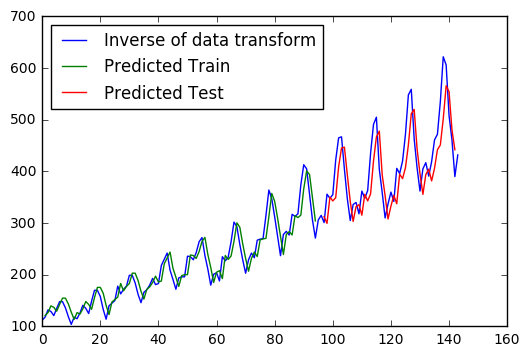

In [351]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset),label="Inverse of data transform")
plt.plot(trainPredictPlot,label="Predicted Train")
plt.plot(testPredictPlot,label="Predicted Test")
plt.legend(loc=0)
plt.show()